# Tree-based methods
### Food sales and obesity

#### Thanks to Fabián Villena for inputs in this code

In [71]:
# Scikit's libraries

import sklearn.ensemble #random forest 
import sklearn.tree #decision trees
import sklearn.linear_model #logistic regression + perceptron
import sklearn.svm #support vector machines
import sklearn.neighbors #k-nearest neighbors
import sklearn.neural_network #multilayer perceptron
from sklearn.ensemble import AdaBoostClassifier

from sklearn.externals.six import StringIO 
from sklearn import metrics
import sklearn.model_selection 
import sklearn.preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# XGBoost
import xgboost as xgb

# Pandas
import pandas as pd

# Numpy
import numpy as np
# Set random seed
np.random.seed(0)

# Plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image  
import pydotplus

In [37]:
# File with food sales and obesity information
data = pd.read_csv('exampleObesityClassReg.csv')
data.sample(10)

,country_name,continent,prevalence,tertile,RTDs/High-Strength Premixes,Processed Fruit and Vegetables,Processed Meat and Seafood,Ready Meals,"Rice, Pasta and Noodles","Sauces, Dressings and Condiments",...,Baby Food,Drinking Milk Products,Yoghurt and Sour Milk Products,Other Dairy,Ice Cream and Frozen Desserts,Cocoa Powder,Emulsifiers and Co-Emulsifiers,Fats and Oils,Flours,Milk
49,Belarus,Europe,0.231179,2,3064.433333,4225.466667,14961.966670,2382.166667,8495.133333,4130.700000,...,1437.633333,44447.96667,21490.166670,19663.466670,2739.866667,206.500000,406.433333,24819.966670,30754.36667,82030.06667
27,Colombia,America,0.178267,2,170.833333,959.300000,3128.466667,176.433333,34723.800000,1383.000000,...,301.266667,42182.16667,3036.900000,1060.033333,1236.300000,253.666667,139.766667,9366.200000,22010.60000,46546.53333
30,Bolivia,America,0.185507,2,319.766667,632.666667,1068.633333,61.900000,34137.833330,1854.233333,...,250.033333,12939.16667,2183.066667,2325.233333,822.166667,107.200000,144.900000,9391.333333,20680.86667,15803.93333
63,United Kingdom,Europe,0.246701,3,2175.033333,44816.100000,32313.366670,15679.666670,8744.866667,13525.233330,...,1025.100000,95073.90000,9369.633333,6384.600000,7785.766667,421.833333,669.700000,24986.233330,44291.43333,116990.30000
45,Latvia,Europe,0.214695,2,6871.133333,7628.333333,13857.633330,2921.966667,7736.666667,12584.500000,...,330.966667,56502.76667,17664.500000,14065.733330,3519.433333,179.700000,559.166667,26338.800000,37478.63333,88511.13333
69,Chile,America,0.289636,3,431.266667,9581.966667,6937.666667,383.466667,17394.666670,6575.500000,...,591.833333,20579.70000,8320.166667,5449.900000,5682.866667,276.866667,483.300000,20101.933330,69019.10000,37038.30000
74,Mexico,America,0.327086,3,874.333333,4488.633333,4637.700000,497.300000,9456.033333,8500.700000,...,659.966667,49364.30000,5119.933333,4731.933333,2428.166667,344.366667,294.066667,28015.733330,108494.43330,65728.83333
76,United Arab Emirates,Africa,0.339133,3,125.533333,9416.633333,4180.066667,236.366667,60477.033330,6268.566667,...,968.133333,34986.36667,26258.566670,11308.533330,2187.900000,158.400000,246.666667,20037.566670,32608.40000,67731.20000
48,Poland,Europe,0.227263,2,86.433333,6823.033333,6944.866667,2191.000000,6284.300000,9210.233333,...,1079.366667,34384.36667,10295.366670,9271.133333,2190.066667,160.133333,492.266667,18090.300000,50266.16667,54810.10000
57,Hungary,Europe,0.240199,3,118.466667,12035.966670,13150.766670,1232.766667,11639.033330,6138.133333,...,669.933333,58358.96667,9365.100000,10013.933330,2870.200000,176.200000,418.800000,22144.933330,59291.53333,79252.20000


In [38]:
data.describe()

,prevalence,tertile,RTDs/High-Strength Premixes,Processed Fruit and Vegetables,Processed Meat and Seafood,Ready Meals,"Rice, Pasta and Noodles","Sauces, Dressings and Condiments",Soup,Spreads,...,Baby Food,Drinking Milk Products,Yoghurt and Sour Milk Products,Other Dairy,Ice Cream and Frozen Desserts,Cocoa Powder,Emulsifiers and Co-Emulsifiers,Fats and Oils,Flours,Milk
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.195593,2.025316,1394.993038,8974.886076,10106.430380,2932.320886,17084.418565,7237.398312,886.935443,1404.284388,...,866.592405,41405.834600,10319.671308,6313.274261,3605.577637,238.948101,334.273840,17541.712658,38715.299156,59598.455695
std,0.080271,0.831660,3223.286924,10368.583261,9167.806130,4183.099990,16382.742090,5340.667764,1516.838457,1294.774159,...,742.174096,33320.311999,8515.322574,6019.665786,3219.524667,180.330916,244.387167,7831.977231,24661.854093,44718.262875
min,0.016048,1.000000,0.000000,21.300000,12.466667,0.000000,1102.900000,96.066667,0.000000,16.366667,...,39.433333,355.966667,8.333333,0.866667,99.966667,10.300000,10.066667,936.700000,1925.800000,618.333333
25%,0.163696,1.000000,62.000000,1648.666667,3178.216667,114.833333,7484.750000,2914.683334,75.500000,351.616667,...,321.333333,11436.866670,3807.400000,1424.216667,1263.950000,99.600000,127.450000,11476.583335,21518.150000,20988.116665
50%,0.206130,2.000000,225.266667,5672.133333,8205.066667,701.466667,10762.400000,6268.566667,230.900000,999.666667,...,645.033333,34384.366670,8851.733333,4543.066667,2327.400000,185.333333,312.866667,18539.566670,34784.433330,53199.933330
75%,0.241439,3.000000,984.966667,11841.866670,14729.166670,4484.800000,16480.733335,10145.200000,974.833333,2004.566667,...,1267.850000,60932.050000,15065.033335,9951.433332,5283.216667,331.866667,500.966667,23198.066670,53836.300000,90095.083335
max,0.353288,3.000000,17711.100000,44816.100000,36891.166670,15679.666670,73856.066670,28564.600000,7801.233333,5651.933333,...,3898.500000,145484.466700,40846.666670,28622.433330,14535.433330,655.400000,1013.600000,37119.366670,119329.800000,189444.000000


In [39]:
# Some columns, such as names or continents, are not predictors
features = data[data.columns.difference(['prevalence','tertile','country_name','continent'])]
features.sample(5)

,Baby Food,Baked Goods,Beer,Bottled Water,Breakfast Cereals,Butter and Margarine,Carbonates,Cheese,Chocolate Confectionery,Cocoa Powder,...,Sports and Energy Drinks,Spreads,Starchy Roots,Sugar Confectionery,Sugar and Sweeteners,"Sweet Biscuits, Snack Bars and Fruit Snacks",Tea,Vegetables,Wine,Yoghurt and Sour Milk Products
4,644.566667,3154.50000,632.466667,48291.76667,19.066667,197.433333,2537.766667,50.700000,246.466667,79.166667,...,1033.833333,61.600000,63010.36667,619.100000,7605.200000,797.366667,335.033333,39025.73333,80.5000,276.30000
44,1782.366667,54447.93333,60562.200000,98986.76667,2549.833333,6588.466667,46943.433330,11008.100000,1567.433333,329.933333,...,896.033333,1203.800000,31282.00000,1118.733333,6496.166667,5623.900000,53.900000,101521.03330,47800.1333,17166.23333
62,1468.500000,61043.63333,127574.166700,40230.93333,7636.866667,10577.900000,103062.666700,5448.966667,8329.700000,334.233333,...,10059.900000,1640.000000,52866.83333,3278.966667,8137.166667,6877.933333,2460.433333,59545.40000,16988.0000,12243.00000
24,1580.533333,80481.36667,71435.800000,25552.83333,1840.800000,12334.500000,72100.333330,11154.933330,5275.133333,575.833333,...,6646.700000,3811.166667,66090.50000,4972.000000,5124.600000,10241.266670,671.900000,51224.66667,22500.3667,33144.33333
5,225.633333,3744.90000,28878.933330,12520.36667,64.233333,21.000000,7683.766667,12.033333,60.000000,77.466667,...,652.100000,113.600000,57375.56667,1082.000000,4935.166667,1079.733333,233.800000,141560.13330,1868.4667,1889.80000


In [40]:
feature_names = features.columns
feature_names

Index(['Baby Food', 'Baked Goods', 'Beer', 'Bottled Water',
       'Breakfast Cereals', 'Butter and Margarine', 'Carbonates', 'Cheese',
       'Chocolate Confectionery', 'Cocoa Powder', 'Coffee', 'Concentrates',
       'Drinking Milk Products', 'Edible Oils', 'Eggs',
       'Emulsifiers and Co-Emulsifiers', 'Fats and Oils', 'Fish and Seafood',
       'Flours', 'Fruits', 'Gum', 'Ice Cream and Frozen Desserts', 'Juice',
       'Meat', 'Milk', 'Nuts', 'Other Dairy', 'Other Hot Drinks',
       'Processed Fruit and Vegetables', 'Processed Meat and Seafood',
       'Pulses', 'RTDs/High-Strength Premixes', 'Ready Meals',
       'Rice, Pasta and Noodles', 'Sauces, Dressings and Condiments',
       'Savoury Snacks', 'Soup', 'Spirits', 'Sports and Energy Drinks',
       'Spreads', 'Starchy Roots', 'Sugar Confectionery',
       'Sugar and Sweeteners', 'Sweet Biscuits, Snack Bars and Fruit Snacks',
       'Tea', 'Vegetables', 'Wine', 'Yoghurt and Sour Milk Products'],
      dtype='object')

In [41]:
labels_numerical = data.prevalence
labels_numerical.sample(5)

0     0.016048
26    0.172975
76    0.339133
66    0.263871
42    0.209111
Name: prevalence, dtype: float64

In [42]:
labels_categorical = data.tertile
labels_categorical.sample(5)

13    1
65    3
15    1
66    3
43    2
Name: tertile, dtype: int64

Normalizing the numerical variables into a min max scaler where the maximum value is transformed into a 1 and the minimum value is 0


In [43]:
minMaxScaler = sklearn.preprocessing.MinMaxScaler()
features = minMaxScaler.fit_transform(features)

features[1,:]

array([0.00000000e+00, 4.14625178e-03, 5.97066354e-03, 1.38926517e-03,
       6.53400421e-04, 3.54754613e-02, 0.00000000e+00, 2.49226287e-03,
       3.70575518e-03, 4.18539761e-03, 2.94462690e-03, 3.00890237e-03,
       6.05109724e-02, 7.13792131e-02, 4.55675412e-02, 1.99295821e-03,
       4.88290894e-02, 7.35588311e-02, 0.00000000e+00, 2.68709617e-01,
       2.03259561e-02, 1.23538322e-03, 2.12884275e-03, 0.00000000e+00,
       4.70117939e-02, 7.60314274e-01, 1.80516557e-03, 1.17501501e-02,
       3.69090460e-04, 0.00000000e+00, 9.35230346e-01, 3.31242366e-04,
       8.84372542e-04, 5.78210804e-04, 3.97280740e-03, 1.28926699e-02,
       4.23010037e-04, 5.11506886e-02, 2.65692938e-04, 8.87222226e-05,
       1.34909559e-01, 8.27348276e-03, 1.55331838e-01, 6.61016499e-02,
       9.87912653e-02, 3.83204172e-01, 1.57599979e-04, 6.25311186e-03])

### Dividing in training and testing

In [44]:
features_train, features_test, labels_numerical_train, labels_numerical_test = sklearn.model_selection.train_test_split(
    features,
    labels_numerical,
    test_size=0.30,
    random_state = 55
)

In [45]:
# Number of observations in each dataset
print('Observations for training:', len(labels_numerical_train))
print('Observations for testing:',len(labels_numerical_test))

Observations for training: 55
Observations for testing: 24


### Random Forest regressor

In [46]:
regressor = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=15)

In [47]:
regressor.fit(features_train,labels_numerical_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=15, verbose=0,
                      warm_start=False)

Predicting the labels from the test features subset

In [48]:
predictions = regressor.predict(features_test)

In [49]:
summary = pd.DataFrame(list(zip(data.country_name,labels_numerical_test,predictions)),columns=['country','true','predicted'])
summary['AE'] = abs(summary.true - summary.predicted)
summary = summary.sort_values(by='AE',ascending=True)
summary

,country,true,predicted,AE
11,Taiwan,0.083790,0.083843,0.000053
6,Pakistan,0.254970,0.253157,0.001814
22,Uzbekistan,0.245770,0.248652,0.002883
7,Singapore,0.212405,0.219636,0.007231
2,Japan,0.241884,0.253040,0.011156
4,Indonesia,0.046816,0.064171,0.017354
15,Malaysia,0.240199,0.221080,0.019119
9,Nigeria,0.165021,0.194351,0.029331
1,India,0.070481,0.100898,0.030417
10,Republic of Korea,0.197482,0.233759,0.036278


Calculating MAE
$$MAE = \frac{1}{n}\sum_{i=1}^{n}\left | y_{i} - \hat{y}_{i} \right |$$

In [50]:
sklearn.metrics.mean_absolute_error(labels_numerical_test,predictions)

0.047429547056249986

Calculating RMSE
$$RMSE = \sqrt {\frac{1}{n}\sum_{j=1}^{n}\left ( y_{i} - \hat{y}_{i} \right )^{2}}$$

In [51]:
sklearn.metrics.mean_squared_error(labels_numerical_test,predictions)**0.5

0.06232385596461852

Exploring the absolute errors by country that are in the testing dataset

In [52]:
summary

,country,true,predicted,AE
11,Taiwan,0.083790,0.083843,0.000053
6,Pakistan,0.254970,0.253157,0.001814
22,Uzbekistan,0.245770,0.248652,0.002883
7,Singapore,0.212405,0.219636,0.007231
2,Japan,0.241884,0.253040,0.011156
4,Indonesia,0.046816,0.064171,0.017354
15,Malaysia,0.240199,0.221080,0.019119
9,Nigeria,0.165021,0.194351,0.029331
1,India,0.070481,0.100898,0.030417
10,Republic of Korea,0.197482,0.233759,0.036278


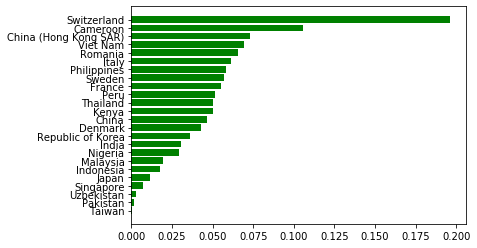

In [53]:
plt.barh(summary.country,summary.AE,color='g')
plt.show()

### Now you do the classification 

In [54]:
# Split in train and test

# sklearn.ensemble.RandomForestClassifier

# classifier.fit


### Confusion matrix

In [55]:
#predictions = classifier.predict(features_test)

Printing the confusion matrix between the true and predicted values

In [56]:
#print(sklearn.metrics.confusion_matrix(predictions, labels_categorical_test))

Extracting some performance metrics from the prediction

In [57]:
#print(sklearn.metrics.classification_report(predictions, labels_categorical_test))

Returning the probability of being classified as each class along with their true label

In [58]:
#predictions_probabilities = classifier.predict_proba(features_test)
#predictions_probabilities = pd.DataFrame(predictions_probabilities)
#predictions_probabilities_labels = pd.concat([predictions_probabilities,pd.DataFrame(list(labels_categorical_test))], axis=1)
#predictions_probabilities_labels.columns = ['class_1_probability','class_2_probability','class_3_probability','true_class']
#predictions_probabilities_labels

### Variable importance list

In [59]:
vil = pd.DataFrame(list(zip(feature_names,regressor.feature_importances_)),
                   columns=['feature','mse']
                  ).sort_values(by='mse', ascending=False)

In [60]:
vil.head()

,feature,mse
18,Flours,0.216724
1,Baked Goods,0.198426
30,Pulses,0.095162
25,Nuts,0.077482
10,Coffee,0.055321


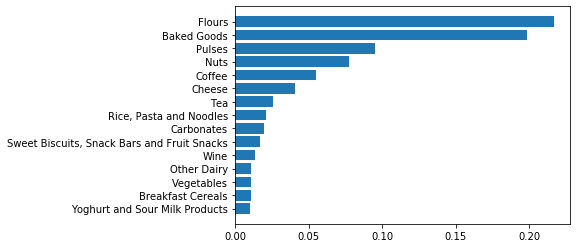

In [61]:
ax = plt.barh(data = vil.sort_values(by='mse').tail(15), 
         y='feature', 
         width = 'mse'
        )
plt.show()

### Do the same for classification. Are the VIL the same? Why?

In [62]:
rf_vil  = []
for i in range(50):
    rf = sklearn.ensemble.RandomForestRegressor(n_estimators=100)
    rf = rf.fit(features_train,labels_numerical_train)
    rf_vil.append(rf.feature_importances_)
mean_vil = np.mean(rf_vil, axis = 0)

In [63]:
mean_vil = pd.DataFrame(list(zip(feature_names,mean_vil)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [64]:
mean_vil.head()

,feature,mean_gini_decrease
1,Baked Goods,0.210890
18,Flours,0.162897
25,Nuts,0.107380
30,Pulses,0.095951
10,Coffee,0.051143


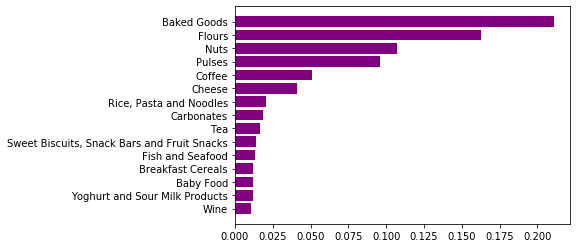

In [65]:
ax = plt.barh(data = mean_vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease',
         color = 'purple'     
        )
plt.show()

#### Note que baked goods and flours fight for the same place. Why? 

## Different metrics to measure performance

In [66]:
models = []

models.append(("LinearRegression",sklearn.linear_model.LinearRegression()))
models.append(("SVR",sklearn.svm.SVR()))
models.append(("RandomForest",sklearn.ensemble.RandomForestRegressor()))
models.append(("KNeighbors",sklearn.neighbors.KNeighborsRegressor()))
models.append(("MLPRegressor",sklearn.neural_network.MLPRegressor()))
models.append(("DecisionTreeRegressor",sklearn.tree.DecisionTreeRegressor()))


results = []
names = []
for name,model in models:
    result = sklearn.model_selection.cross_val_score(model, 
                             features, 
                             labels_numerical,  
                             cv=10, 
                             scoring='neg_mean_absolute_error',
                             n_jobs=-1
                            )
    names.append(name)
    results.append(result)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)


List of compared models along with their hyperparameters

In [67]:
models

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('SVR', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
      gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
      tol=0.001, verbose=False)),
 ('RandomForest',
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators='warn',
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)),
 ('KNeighbors',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform')),
 ('MLPR

Box plot of the results (negative mean absolute error) of each model

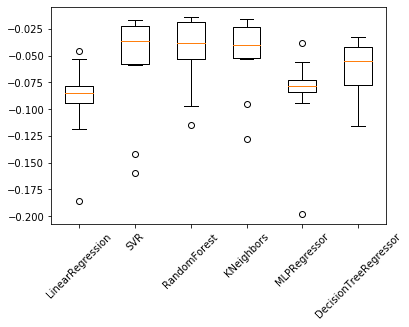

In [68]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=45)
plt.show()

### Try to do the same for classification

## XGBoost and AdaBoost compared to Random Forest

In [69]:
xgb_model =  xgb.XGBClassifier()
acc_xgb = cross_val_score(xgb_model,features,labels_categorical, cv=10, scoring='accuracy')
print(f'Accuracy XGB: {np.mean(acc_xgb)}')

Accuracy XGB: 0.557936507936508


In [72]:
ada_model =  AdaBoostClassifier()
acc_ada= cross_val_score(ada_model,features,labels_categorical, cv=10, scoring='accuracy')
print(f'Accuracy AdaBoost: {np.mean(acc_ada)}')

Accuracy AdaBoost: 0.47698412698412695


In [73]:
rf_model = sklearn.ensemble.RandomForestClassifier()
acc_rf = cross_val_score(rf_model,features,labels_categorical, cv=10, scoring='accuracy')
print(f'Accuracy RF: {np.mean(acc_rf)}')

Accuracy RF: 0.506547619047619


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

## Comparing accuracy

Text(0.5, 1.0, 'Boxplot (10-fold CV)')

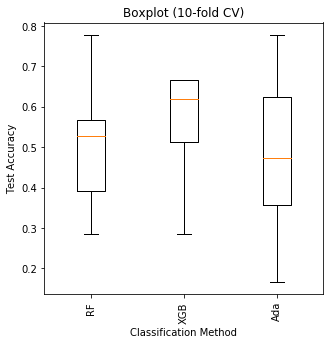

In [74]:
plt.figure(figsize=(5,5))
plt.boxplot([acc_rf,acc_xgb,acc_ada])
plt.xlabel('Classification Method', fontsize=10)
plt.ylabel('Test Accuracy', fontsize=10)
plt.xticks([1,2,3],['RF','XGB','Ada'],
          rotation=90)
plt.title('Boxplot (10-fold CV)')

#plt.savefig('boxplots.png',bbox_inches='tight')